In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ["Tshirt", "Trouser", "Pullover","Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot" ]

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[0]

9

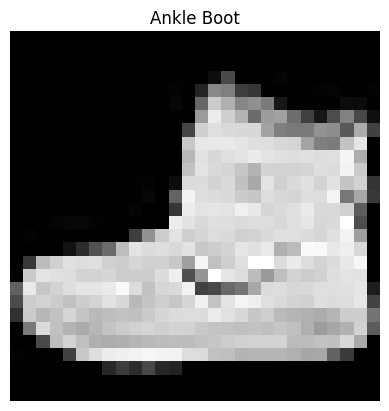

In [ ]:
plt.imshow(x_train[0], cmap = "gray")
plt.title(class_names[y_train[0]])
plt.axis(False)
plt.show()

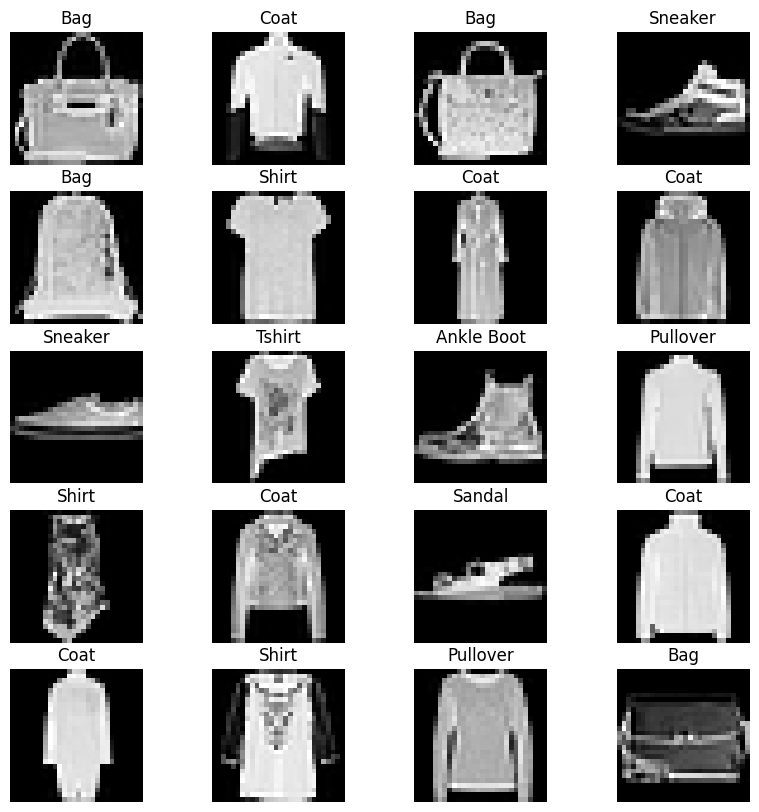

In [ ]:
indices = np.random.randint(0,60000, 20)
plt.figure(figsize=(10,10))

for i in range(len(indices)):
  plt.subplot(5,4, i+1)
  plt.imshow(x_train[indices[i]], cmap = "gray")
  plt.title(class_names[y_train[indices[i]]])
  plt.axis(False)
plt.show()


In [ ]:
#normalization of images
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
model = tf.keras.Sequential()
#add convolutional layer --> convolutional operation
model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = "relu", input_shape = (28,28,1)))
#add max pooling layer
model.add(MaxPool2D())

#add convolutional and pooling layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = "relu"))
model.add(MaxPool2D())

#flatten the image
model.add(Flatten())

#FCN - fully connected network
model.add(Dense(64, activation = 'tanh'))

#output layer
model.add(Dense(10, activation = 'softmax'))





In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [ ]:
# loss is taken as SparseCategoricalCrossentropy since it is the case of multi classification
#from_logists will give probability by itself, since we haven't added any activation function in the output layer
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
#in the metrics part you can also add precision, recall as metrics = ['accuracy', 'precision', 'recall']

model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 27s 7ms/step - loss: 0.4644 - accuracy: 0.8310 - val_loss: 0.3601 - val_accuracy: 0.8693
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3122 - accuracy: 0.8860 - val_loss: 0.3241 - val_accuracy: 0.8804
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2701 - accuracy: 0.8992 - val_loss: 0.2919 - val_accuracy: 0.8925
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2386 - accuracy: 0.9111 - val_loss: 0.2900 - val_accuracy: 0.8955
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2171 - accuracy: 0.9192 - val_loss: 0.2651 - val_accuracy: 0.8998


In [ ]:
model.predict(x_test[100].reshape(1,28,28))

1/1 [==============================] - 0s 142ms/step


array([[1.4100321e-04, 1.1062418e-03, 2.6880205e-05, 9.9815720e-01,
        1.0063916e-04, 1.8373097e-05, 3.7614303e-04, 4.4495329e-05,
        1.2045913e-05, 1.6970393e-05]], dtype=float32)

In [ ]:
np.argmax(model.predict(x_test[100].reshape(1,28,28)))

1/1 [==============================] - 0s 22ms/step


3

In [ ]:
class_names[3]

'Dress'

In [ ]:
y_test[100]

3

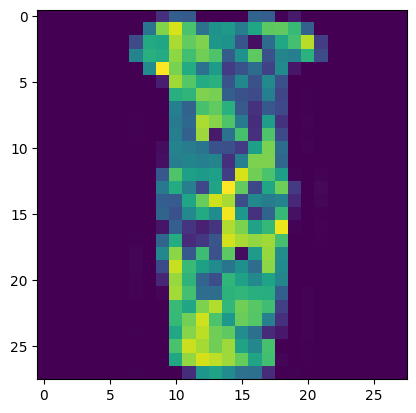

In [ ]:
plt.imshow(x_test[100])